###                                                             ИТОГОВАЯ РАБОТА

In [237]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

%matplotlib inline

In [214]:
df = pd.read_csv('churn.csv')
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Перечень полей:
- state – штат;
- account length – абонентский стаж;
- area code – код региона;
- phone number – номер телефона;
- international plan – тарифный план для международных звонков;
- voice mail plan – тарифный план для голосовой почты;
- number vmail messages – количество сообщений голосовой почты;
- total day minutes – общая длительность звонков в дневное время (мин);
- total day calls – общее количество звонков в дневное время;
- total day charge – общая стоимость звонков в дневное время;
- total eve minutes – общая длительность звонков в вечернее время (мин);
- total eve calls – общее количество звонков в вечернее время;
- total eve charge – общая стоимость звонков в вечернее время;
- total night minutes – общая длительность звонков в ночное время (мин);
- total night calls – общее количество звонков в ночное время;
- total night charge – общая стоимость звонков в ночное время;
- total intl minutes – общая длительность международных звонков (мин);
- total intl calls – общее количество международных звонков;
- total intl charge – общая стоимость международных звонков;
- number customer service calls – количество звонков в службу поддержки.
- churned – покинул ли клиент компанию

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   international_plan             5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

#### 1. Построить гистограмму количества звонков в техническую поддержку

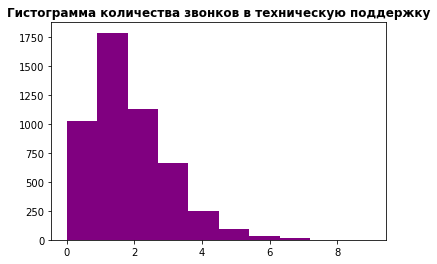

In [216]:
plt.hist(df['number_customer_service_calls'], 10, facecolor='purple')
plt.title('Гистограмма количества звонков в техническую поддержку',fontweight="bold")
plt.show()

#### 2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)

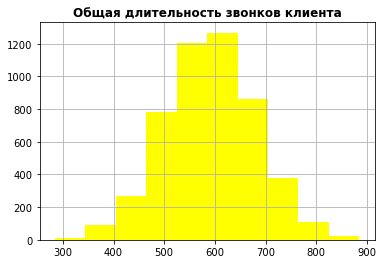

In [217]:
df['summa_minut'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']
plt.hist(summa_minut, facecolor='yellow')
plt.title('Общая длительность звонков клиента',fontweight="bold")
plt.grid(True)
plt.show()

#### 3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

In [218]:
def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = float(sum(x)) / n
    avg_y = float(sum(y)) / n
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff
    return diffprod / pow((xdiff2 * ydiff2), 0.5)

In [219]:
print ('Коэффицент корреляции Пирсона:', pearson_def(df['summa_minut'], df['number_customer_service_calls']))

Коэффицент корреляции Пирсона: -0.01140791082744116


In [220]:
corr, p_value = pearsonr(df['summa_minut'], df['number_customer_service_calls'])
print('Коэффициент корреляции Пирсона,используя встроенную функцию:', corr)

Коэффициент корреляции Пирсона,используя встроенную функцию: -0.011407910827441413


#### 4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

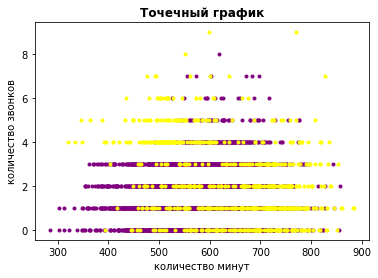

In [221]:
#остался 
plt.scatter(df[df['churned']==False]['summa_minut'], df[df['churned']==False]['number_customer_service_calls'], marker='.',color='purple')
#ушёл
plt.scatter(df[df['churned']==True]['summa_minut'], df[df['churned']==True]['number_customer_service_calls'], marker='.', color='yellow')
plt.xlabel('количество минут')
plt.ylabel('количество звонков')
plt.title('Точечный график',fontweight="bold")

plt.show()

#### 5. Вывести top-5 самых много и самых мало говорящих клиентов

In [222]:
data=df.sort_values(by='summa_minut', ascending=False)
print('\ntop-5 самых многоговорящих: \n',data.phone_number.values[:5],
     '\ntop-5 самых малоговорящих: \n',data.phone_number.values[-5:])


top-5 самых многоговорящих: 
 ['345-9140' '352-6976' '345-3787' '410-3888' '370-4667'] 
top-5 самых малоговорящих: 
 ['375-8934' '405-9233' '362-8044' '380-5246' '331-3174']


#### 6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [223]:
state2 = list(set(df.state))
for state in state2:
    print('Штат',state+':\nДоля оттока: ',df[ (df.churned == True) & (df.state == state)].count().values[0]/df[df.state == state].count().values[0]*100,'% ;',
          '\t\t\tСредняя стоимость минуты дневного времени:',sum(df[ (df.state == state)].total_day_minutes/df[ (df.state == state)].total_day_charge)/df[df.state == state].count().values[0],'\n')

Штат MS:
Доля оттока:  17.17171717171717 % ; 			Средняя стоимость минуты дневного времени: 5.882220421276362 

Штат MI:
Доля оттока:  17.475728155339805 % ; 			Средняя стоимость минуты дневного времени: 5.882257666995782 

Штат NJ:
Доля оттока:  25.0 % ; 			Средняя стоимость минуты дневного времени: 5.882321140510802 

Штат OH:
Доля оттока:  12.931034482758621 % ; 			Средняя стоимость минуты дневного времени: 5.882074380386846 

Штат RI:
Доля оттока:  7.07070707070707 % ; 			Средняя стоимость минуты дневного времени: 5.8821977073719305 

Штат NH:
Доля оттока:  12.631578947368421 % ; 			Средняя стоимость минуты дневного времени: 5.882204467955354 

Штат GA:
Доля оттока:  12.048192771084338 % ; 			Средняя стоимость минуты дневного времени: 5.882254301795718 

Штат CT:
Доля оттока:  16.161616161616163 % ; 			Средняя стоимость минуты дневного времени: 5.882295627575001 

Штат NV:
Доля оттока:  18.88888888888889 % ; 			Средняя стоимость минуты дневного времени: 5.882250442493118 

Штат NM:


#### 7. Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [224]:
pd.get_dummies(df['state'])

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [225]:
data=df
data=data.drop (columns = ['phone_number', 'area_code','international_plan','voice_mail_plan','summa_minut'])
data.head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [226]:
data = pd.get_dummies(data, ['state'])
data.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0


In [227]:
data.columns

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned', 'state_AK', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 's

Cфрормируем признаки и целевую переменную,выполним разделение данных на данные для обучения и проверки

In [228]:
X, y = data[['account_length', 'total_day_minutes', 'total_eve_minutes',
             'total_night_minutes', 'number_customer_service_calls', 'total_intl_minutes',
            'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV',
       'state_WY']], data['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [229]:
X_train.head()

,account_length,total_day_minutes,total_eve_minutes,total_night_minutes,number_customer_service_calls,total_intl_minutes,state_AK,state_AL,state_AR,state_AZ,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
629,76,299.5,226.7,210.7,0,13.7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4576,131,256.6,225.2,190.2,1,11.1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4201,151,154.4,210.6,167.9,3,7.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1393,170,246.4,228.1,166.4,0,9.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4449,85,164.0,229.4,220.7,1,9.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
y_train.head()

629      True
4576     True
4201    False
1393    False
4449    False
Name: churned, dtype: bool

#### 9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas.

In [231]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [232]:
KNN_model = KNeighborsClassifier(n_neighbors=5) 
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [233]:
svc_model=SVC()
svc_model.fit(X_train, y_train)

SVC()

In [234]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [235]:
SVC_prediction = svc_model.predict(X_test) 
KNN_prediction = KNN_model.predict(X_test)
Logistic_prediction = logistic.predict(X_test)

Эти команды обучили модели и теперь классификаторы могут делать прогнозы и сохранять результат в какую-либо переменную.

In [263]:
# Оценка точности — простейший вариант оценки работы классификатора
print('SVC accuracy -',accuracy_score(SVC_prediction, y_test))  
print('KNN accuracy -',accuracy_score(KNN_prediction, y_test)) 
print('Logistic accuracy -',accuracy_score(Logistic_prediction, y_test))  


SVC accuracy - 0.854
KNN accuracy - 0.858
Logistic accuracy - 0.856


In [264]:
print('SVC recall -',recall_score(SVC_prediction, y_test))  
print('KNN recall -',recall_score(KNN_prediction, y_test)) 
print('Logistic recall -',recall_score(Logistic_prediction, y_test))  


SVC recall - 1.0
KNN recall - 0.6190476190476191
Logistic recall - 0.5789473684210527


матрица неточности и отчёт о классификации дадут больше информации о производительности:

In [258]:
print('SVC\n',confusion_matrix(SVC_prediction, y_test))  
print('Logistic\n',confusion_matrix(Logistic_prediction, y_test))
print('KNN\n',confusion_matrix(KNN_prediction, y_test))

SVC
 [[853 146]
 [  0   1]]
Logistic
 [[845 136]
 [  8  11]]
KNN
 [[845 134]
 [  8  13]]


In [261]:
print('KNN\n',classification_report(KNN_prediction, y_test)) 
print('SVC\n',classification_report(SVC_prediction, y_test))
print('Logistic\n',classification_report(Logistic_prediction, y_test))

KNN
               precision    recall  f1-score   support

       False       0.99      0.86      0.92       979
        True       0.09      0.62      0.15        21

    accuracy                           0.86      1000
   macro avg       0.54      0.74      0.54      1000
weighted avg       0.97      0.86      0.91      1000

SVC
               precision    recall  f1-score   support

       False       1.00      0.85      0.92       999
        True       0.01      1.00      0.01         1

    accuracy                           0.85      1000
   macro avg       0.50      0.93      0.47      1000
weighted avg       1.00      0.85      0.92      1000

Logistic
               precision    recall  f1-score   support

       False       0.99      0.86      0.92       981
        True       0.07      0.58      0.13        19

    accuracy                           0.86      1000
   macro avg       0.53      0.72      0.53      1000
weighted avg       0.97      0.86      0.91      1000


Количество правильных прогнозов идёт с верхнего левого угла в нижний правый. 